In [11]:
from pprint import pprint
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from probsevere import ProbSevere

In [12]:
def make_basemap(latrange=None,lonrange=None):
    lon_0 = np.mean(lonrange)
    lat_0 = np.mean(latrange)
    return Basemap(projection='merc',lon_0=lon_0, lat_0=lat_0, lat_ts=lat_0,
            llcrnrlat=np.min(latrange), urcrnrlat=np.max(latrange),
            llcrnrlon=np.min(lonrange), urcrnrlon=np.max(lonrange))

In [13]:
with open('sample_data/MRMS_PROBSEVERE_20210928_155238.json', 'r') as f:
    fc = json.load(f)
    vt = fc['validTime']
    feats = fc['features']
    ps = ProbSevere(valid_time=vt, features=feats)


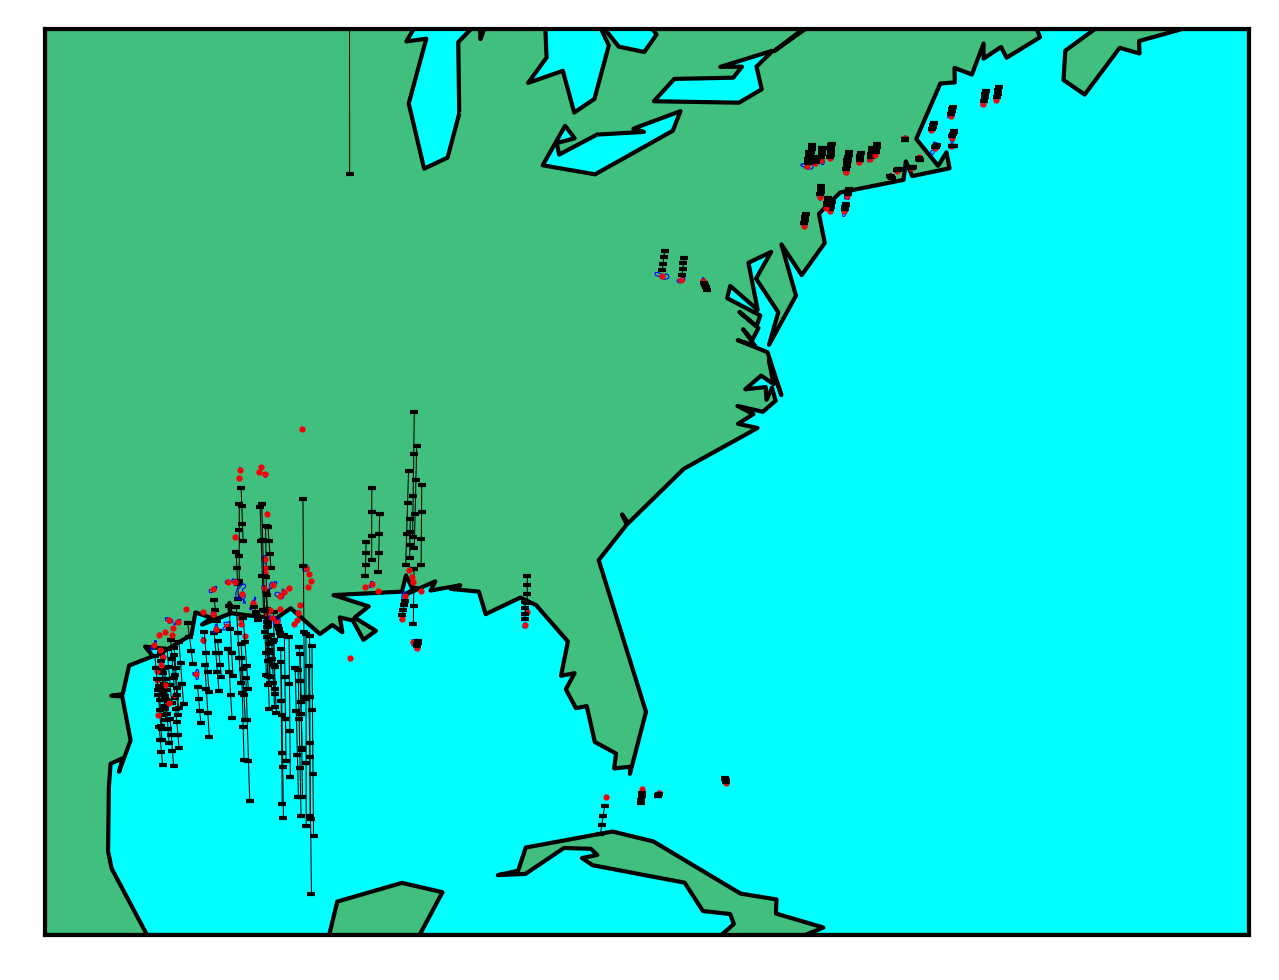

In [27]:
features = ps.feature_collection['features']
latrange=[20,45]
lonrange=[-100,-60]

plt.figure(dpi=300)
m = make_basemap(latrange,lonrange)
for feature in features:
    geometries= feature['geometry']['geometries']
    for crds in geometries:
        ctype = crds['type'] 
        coordinates = crds['coordinates']

        if ctype == 'Polygon':
            lon0,lat0=np.rollaxis(np.array(coordinates), 2, 0)
            x,y=m(*lon0,*lat0)
            m.plot(x,y, marker=None,color='b', linewidth=.25)
            pass
        elif ctype == 'MultiLineString':
            lon1,lat1=np.rollaxis(np.array(coordinates), 2, 0)
            x,y=m(*lon1,*lat1)
            m.plot(x, y, marker='_', color='k', linewidth=.25,markersize=2)
            pass
        elif ctype == 'Point':
            lon2,lat2= coordinates
            x,y=m(lon2,lat2)
            m.plot(x,y, marker='.',color='r',markersize=1)
            pass

m.fillcontinents(color=(0.5,0.5,0,.5),lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
plt.show()

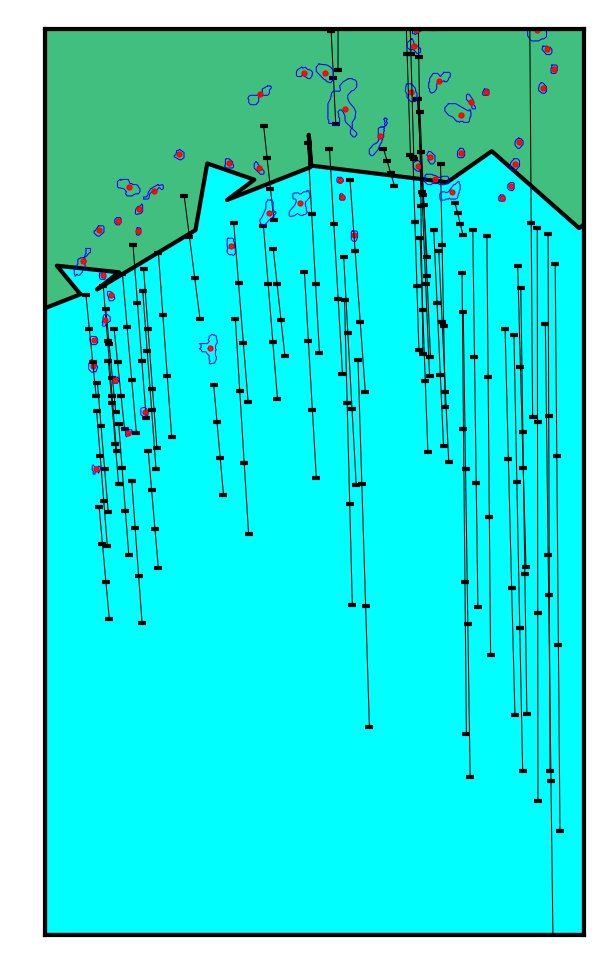

In [22]:
features = ps.feature_collection['features']
latrange=[22,31]
lonrange=[-96.8,-90.8]
plt.figure(dpi=300)
m = make_basemap(latrange,lonrange)

for feature in features:
    geometries= feature['geometry']['geometries']

    for crds in geometries:
        ctype = crds['type'] 
        coordinates = crds['coordinates']

        if ctype == 'Polygon':
            lon0,lat0=np.rollaxis(np.array(coordinates), 2, 0)
            x,y=m(*lon0,*lat0)
            m.plot(x,y, marker=None,color='b', linewidth=.25)

        elif ctype == 'MultiLineString':
            lon1,lat1=np.rollaxis(np.array(coordinates), 2, 0)
            x,y=m(*lon1,*lat1)
            m.plot(x, y, marker='_', color='k', linewidth=.25,markersize=2)

        elif ctype == 'Point':
            lon2,lat2= coordinates
            x,y=m(lon2,lat2)
            m.plot(x,y, marker='.',color='r',markersize=1)

m.fillcontinents(color=(0.5,0.5,0,.5),lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
plt.show()